Author: Adam Moss

Data from

https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
df = pd.read_csv('all_cause_mortality/all_cause_mortality.csv')
df['population_correction'] = df['Population'][0] / df['Population']

In [3]:
df.head()

,Year,Population,1,2,3,4,5,6,7,8,...,45,46,47,48,49,50,51,52,53,population_correction
0,2020,68065223,12254,14058,12990,11856,11612,10986,10944,10841,...,11812,12254,12535,12456,12303,12292,13011,0,0,1.000000
1,2019,67530172,10955,12609,11860,11740,11297,11660,11824,11295,...,10697,10650,10882,10958,10816,11188,11926,7533,0,1.007923
2,2018,67141684,12723,15050,14256,13935,13285,12495,12246,12142,...,10151,10193,9957,10033,10287,10550,11116,7131,0,1.013755
3,2017,66727461,11991,13715,13610,12877,12485,12269,11644,11794,...,10346,10275,10621,10538,10781,11217,12517,8487,0,1.020048
4,2016,66297944,13045,11501,11473,11317,11052,11170,10590,11056,...,10470,10694,10603,10439,11223,10533,11493,8003,0,1.026657


In [4]:
def get_excess_deaths(min_week, max_week):
    vals = np.array([df['%s ' % s].values * df['population_correction'] for s in range(min_week, max_week + 1)]) 
    deaths = vals.sum(axis=0)
    # Use 2010-2019 to obtain mean and standard deviation
    mean_deaths = np.mean(deaths[1:])
    std_deaths = np.std(deaths[1:])
    excess_deaths = deaths[0] - mean_deaths 
    z_score = excess_deaths / std_deaths
    p_value = norm.sf(abs(z_score))*2
    return int(excess_deaths), p_value

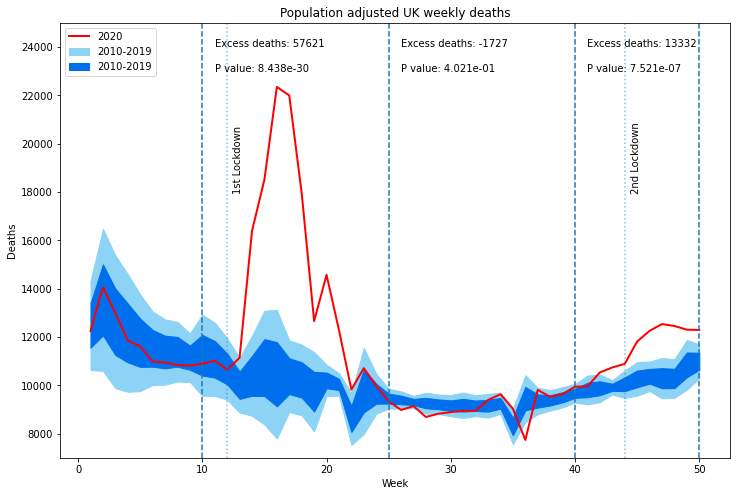

In [5]:
min_week = 1
max_week = 50
vals = np.array([df['%s '% s].values * df['population_correction'] for s in range(min_week, max_week + 1)]) 
mean_deaths = np.mean(vals[:,1:], axis=1)
std_deaths = np.std(vals[:,1:,], axis=1)
plt.figure(figsize=(12,8))
plt.fill_between(range(min_week, max_week + 1), mean_deaths - 2*std_deaths, mean_deaths + 2*std_deaths, color='#8CD3F5', label='2010-2019')
plt.fill_between(range(min_week, max_week + 1), mean_deaths - std_deaths, mean_deaths + std_deaths, color='#006FED', label='2010-2019')
plt.plot(range(min_week, max_week + 1), vals[:,0], color='red', linewidth=2, label='2020')
plt.xlabel('Week')
plt.ylabel('Deaths')
plt.axvline(12, linestyle=':', alpha=0.5)
plt.text(12.5, 18000, '1st Lockdown', rotation=90)
plt.axvline(44, linestyle=':', alpha=0.5)
plt.text(44.5, 18000, '2nd Lockdown', rotation=90)
excess_deaths, p_value = get_excess_deaths(10,25)
plt.text(11, 24000, 'Excess deaths: %s' % excess_deaths, rotation=0)
plt.text(11, 23000, 'P value: %.3e' % p_value, rotation=0)
excess_deaths, p_value = get_excess_deaths(25,40)
plt.text(26, 24000, 'Excess deaths: %s' % excess_deaths, rotation=0)
plt.text(26, 23000, 'P value: %.3e' % p_value, rotation=0)
excess_deaths, p_value = get_excess_deaths(40,50)
plt.text(41, 24000, 'Excess deaths: %s' % excess_deaths, rotation=0)
plt.text(41, 23000, 'P value: %.3e' % p_value, rotation=0)
plt.axvline(10, linestyle='--')
plt.axvline(25, linestyle='--')
plt.axvline(40, linestyle='--')
plt.axvline(50, linestyle='--')
plt.legend()
plt.ylim(7000, 25000)
plt.title('Population adjusted UK weekly deaths')
plt.savefig('plots/total_deaths.png')